In [165]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [166]:
df = pd.read_csv('C:\\Users\\italo\\Desktop\\SAÚDE E IA\\Database\\mtsamples.csv')
df

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...,...
4994,4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


Etapa de pré-processamento 

In [167]:
df.columns

Index(['Unnamed: 0', 'description', 'medical_specialty', 'sample_name',
       'transcription', 'keywords'],
      dtype='str')

In [168]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         4999 non-null   int64
 1   description        4999 non-null   str  
 2   medical_specialty  4999 non-null   str  
 3   sample_name        4999 non-null   str  
 4   transcription      4966 non-null   str  
 5   keywords           3931 non-null   str  
dtypes: int64(1), str(5)
memory usage: 234.5 KB


In [169]:
df.mean(numeric_only=True)

Unnamed: 0    2499.0
dtype: float64

In [170]:
df.isnull().sum()

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64

In [171]:
df.describe()

,Unnamed: 0
count,4999.000000
mean,2499.000000
std,1443.231328
min,0.000000
25%,1249.500000
50%,2499.000000
75%,3748.500000
max,4998.000000


In [172]:
df.duplicated
df.duplicated().sum()

np.int64(0)

Pré-processamento 

Removendo valores faltantes.

In [173]:
df.dropna(inplace=True)

In [174]:
df.info()

<class 'pandas.DataFrame'>
Index: 3898 entries, 0 to 4995
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         3898 non-null   int64
 1   description        3898 non-null   str  
 2   medical_specialty  3898 non-null   str  
 3   sample_name        3898 non-null   str  
 4   transcription      3898 non-null   str  
 5   keywords           3898 non-null   str  
dtypes: int64(1), str(5)
memory usage: 213.2 KB


Selecionando as 10 especialidades mais recorrentes 

In [175]:
top_10 = df['medical_specialty'].value_counts().head(10)
top_10

medical_specialty
Surgery                          1021
Orthopedic                        303
Cardiovascular / Pulmonary        280
Radiology                         251
Consult - History and Phy.        234
Gastroenterology                  195
Neurology                         168
General Medicine                  146
SOAP / Chart / Progress Notes     142
Urology                           140
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 especialidades médicas')

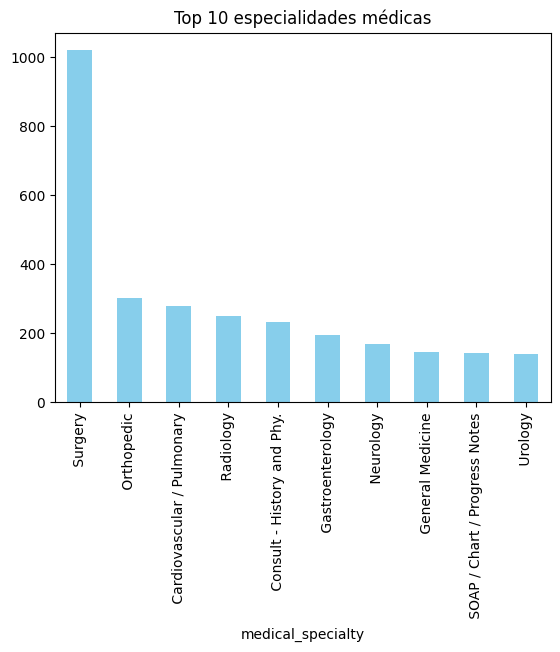

In [176]:
graph_top_10 = top_10.plot(kind='bar', color='skyblue')
graph_top_10.set_title('Top 10 especialidades médicas')

In [177]:
df_top_10 = df[df['medical_specialty'].isin(top_10.index)].copy()
df_top_10.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
7,7,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 3,"2-D ECHOCARDIOGRAM,Multiple views of the heart...","cardiovascular / pulmonary, 2-d echocardiogram..."
9,9,Echocardiogram and Doppler,Cardiovascular / Pulmonary,2-D Echocardiogram - 4,"DESCRIPTION:,1. Normal cardiac chambers size....","cardiovascular / pulmonary, ejection fraction,..."
11,11,"Normal left ventricle, moderate biatrial enla...",Cardiovascular / Pulmonary,2-D Doppler,"2-D STUDY,1. Mild aortic stenosis, widely calc...","cardiovascular / pulmonary, 2-d study, doppler..."


In [178]:
df_top_10.info()

<class 'pandas.DataFrame'>
Index: 2880 entries, 3 to 4975
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         2880 non-null   int64
 1   description        2880 non-null   str  
 2   medical_specialty  2880 non-null   str  
 3   sample_name        2880 non-null   str  
 4   transcription      2880 non-null   str  
 5   keywords           2880 non-null   str  
dtypes: int64(1), str(5)
memory usage: 157.5 KB


medical_specialty
Surgery                          1021
Orthopedic                        303
Cardiovascular / Pulmonary        280
Radiology                         251
Consult - History and Phy.        234
Gastroenterology                  195
Neurology                         168
General Medicine                  146
SOAP / Chart / Progress Notes     142
Urology                           140
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribuição das Top 10 Especialidades Médicas')

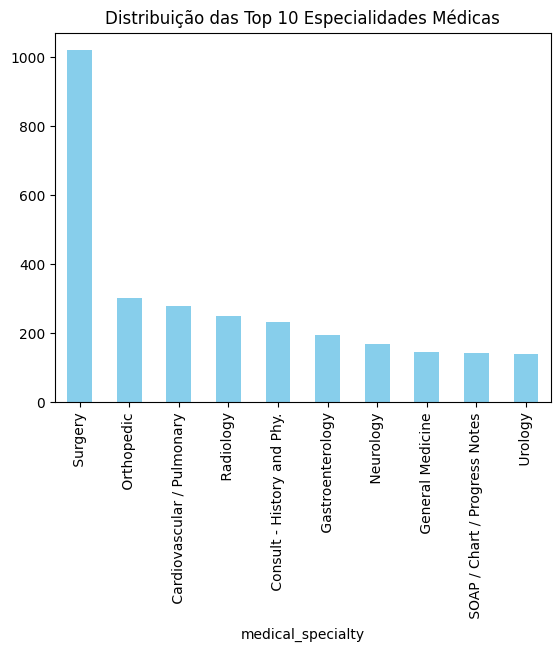

In [179]:
df_top_10['medical_specialty'].value_counts()
print(df_top_10['medical_specialty'].value_counts())
df_top_10['medical_specialty'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribuição das Top 10 Especialidades Médicas')

Como teem-se um número muito maior de cirurgias do que outras especialidades, e visando um menor custo computacional irei aplicar o balanceamento com randomundersampler.

In [180]:
from imblearn.under_sampling import RandomUnderSampler

In [181]:
x=df_top_10.drop('medical_specialty', axis=1)
y=df_top_10['medical_specialty']

In [182]:
rus=RandomUnderSampler(random_state=42, sampling_strategy='all')
X_resampled, y_resampled = rus.fit_resample(x, y)


In [183]:
X_resampled

,Unnamed: 0,description,sample_name,transcription,keywords
4642,4642,Left thoracotomy with drainage of pleural flu...,Thoracotomy & Esophageal Exploration,"PREOPERATIVE DIAGNOSIS: ,Esophageal rupture.,...","cardiovascular / pulmonary, esophageal rupture..."
4743,4743,"Lung, wedge biopsy right lower lobe and resec...",Lung Biopsy Pathology Report,"CLINICAL HISTORY:, A 48-year-old smoker found...","cardiovascular / pulmonary, pet scan, wedge bi..."
4927,4927,He is a 67-year-old man who suffers from chro...,CAD - 6-Month Followup,"REASON FOR VISIT:, Six-month follow-up visit ...",
4947,4947,Bronchoscopy. Atelectasis and mucous plugging.,Bronchoscopy,"PREOPERATIVE DIAGNOSIS: , Atelectasis.,POSTOPE...","cardiovascular / pulmonary,"
4804,4804,"Fiberoptic bronchoscopy, diagnostic. Hemopty...",Fiberoptic Bronchoscopy - 1,"PREOPERATIVE DIAGNOSIS:,1. Hemoptysis.,2. Hi...","cardiovascular / pulmonary, hemoptysis, lung c..."
...,...,...,...,...,...
175,175,Patient with a history of gross hematuria. C...,Bladder Cancer,"CHIEF COMPLAINT: , Bladder cancer.,HISTORY OF ...","urology, retrograde pyelogram, bladder biopsy,..."
76,76,Right orchiopexy and right inguinal hernia re...,Orchiopexy & Hernia Repair - 1,"PREOPERATIVE DIAGNOSIS: , Right undescended te...","urology, ectopic position, inguinal hernia, in..."
23,23,Voluntary sterility. Bilateral vasectomy. T...,Vasectomy,"PREOPERATIVE DIAGNOSIS: , Voluntary sterility....","urology, hemiscrotum, bilateral vasectomy, vol..."
74,74,Reduction of paraphimosis.,Paraphimosis,"PREOPERATIVE DIAGNOSIS: , Phimosis.,POSTOPERAT...","urology, dorsal penile block, reduction of par..."


In [184]:
y_resampled

4642     Cardiovascular / Pulmonary
4743     Cardiovascular / Pulmonary
4927     Cardiovascular / Pulmonary
4947     Cardiovascular / Pulmonary
4804     Cardiovascular / Pulmonary
                   ...             
175                         Urology
76                          Urology
23                          Urology
74                          Urology
154                         Urology
Name: medical_specialty, Length: 1400, dtype: str

In [185]:
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['medical_specialty'])], axis=1)
df_resampled['medical_specialty'].value_counts()

medical_specialty
Cardiovascular / Pulmonary       140
Consult - History and Phy.       140
Gastroenterology                 140
General Medicine                 140
Neurology                        140
Orthopedic                       140
Radiology                        140
SOAP / Chart / Progress Notes    140
Surgery                          140
Urology                          140
Name: count, dtype: int64

O METODO DE BALANCEAMENTO TIROU DADOS DEMAIS, PARA RESOLVER ISSO VAMOS MEXER DIRETAMENTE NA QUANTIDADE DE CIRURGIAS .

In [186]:
cirurgia=df_top_10[df_top_10['medical_specialty']==' Surgery'].sample(frac=0.4, random_state=42)
outros=df_top_10[df_top_10['medical_specialty']!=' Surgery']    


In [187]:
outros.info()

<class 'pandas.DataFrame'>
Index: 1859 entries, 3 to 4975
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         1859 non-null   int64
 1   description        1859 non-null   str  
 2   medical_specialty  1859 non-null   str  
 3   sample_name        1859 non-null   str  
 4   transcription      1859 non-null   str  
 5   keywords           1859 non-null   str  
dtypes: int64(1), str(5)
memory usage: 101.7 KB


In [188]:
cirurgia.info()

<class 'pandas.DataFrame'>
Index: 408 entries, 730 to 704
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         408 non-null    int64
 1   description        408 non-null    str  
 2   medical_specialty  408 non-null    str  
 3   sample_name        408 non-null    str  
 4   transcription      408 non-null    str  
 5   keywords           408 non-null    str  
dtypes: int64(1), str(5)
memory usage: 22.3 KB


In [189]:
df_balanced = pd.concat([cirurgia, outros ], axis=0)

In [190]:
df_balanced.info()

<class 'pandas.DataFrame'>
Index: 2267 entries, 730 to 4975
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         2267 non-null   int64
 1   description        2267 non-null   str  
 2   medical_specialty  2267 non-null   str  
 3   sample_name        2267 non-null   str  
 4   transcription      2267 non-null   str  
 5   keywords           2267 non-null   str  
dtypes: int64(1), str(5)
memory usage: 124.0 KB


Text(0.5, 1.0, 'Distribuição Balanceada das Top 10 Especialidades Médicas')

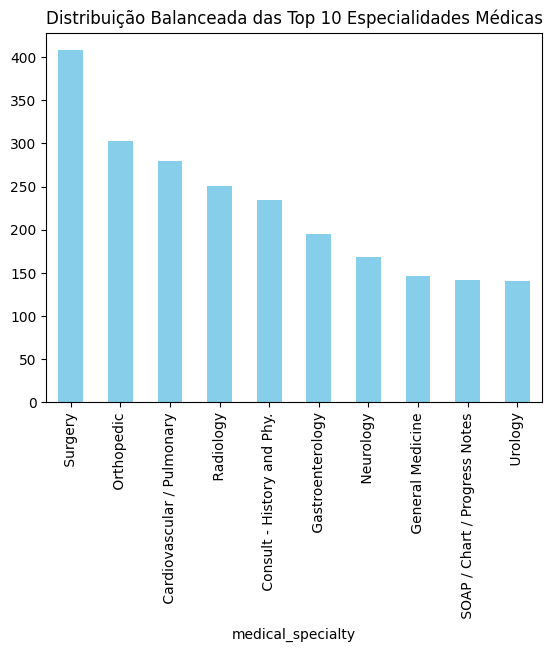

In [191]:
df_balanced['medical_specialty'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribuição Balanceada das Top 10 Especialidades Médicas')

VAMOS AGORA TRATAR USANDO A BIBLIOTECA SPACY OS PONTOS,PALAVRAS REGULARES E OUTRAS COISAS.

In [192]:
import spacy


In [193]:
nlp = spacy.load('en_core_web_sm')

Funcão que limpa o texto

In [194]:
def limpar_texto(texto):
    doc = nlp(texto.lower())
    tokens_limpos = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens_limpos)

aplicando na base

In [195]:
df_balanced_limpo = df_balanced['transcription'].apply(limpar_texto)

In [196]:
df_balanced_limpo.to_frame()

,transcription
730,"preoperative diagnosis left hydrocele ,operati..."
821,"procedure performed:,1 functional endoscopic..."
733,title operation left side large hemicraniect...
210,procedure urgent cardiac catheterization coron...
835,procedure perform esophagogastroduodenoscopy p...
...,...
4967,exam leave heart cath selective coronary angio...
4968,"indication acute coronary syndrome ,consent ..."
4971,angina chest pain lack oxygen heart occur man ...
4972,"indication chest pain ,type test adenosine nuc..."


In [197]:
df_balanced_limpo.to_csv('C:\\Users\\italo\\Desktop\\SAÚDE E IA\\Database\\df_balanced_limpo.csv',index=False)
df_balanced.to_csv('C:\\Users\\italo\\Desktop\\SAÚDE E IA\\Database\\df_balanced.csv',index=False)


In [ ]:
import time
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB, MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, make_scorer
from sklearn.metrics import confusion_matrix

In [199]:
x = pd.read_csv('C:\\Users\\italo\\Desktop\\SAÚDE E IA\\Database\\df_balanced_limpo.csv')
y = pd.read_csv('C:\\Users\\italo\\Desktop\\SAÚDE E IA\\Database\\df_balanced.csv')

In [200]:
x

,transcription
0,"preoperative diagnosis left hydrocele ,operati..."
1,"procedure performed:,1 functional endoscopic..."
2,title operation left side large hemicraniect...
3,procedure urgent cardiac catheterization coron...
4,procedure perform esophagogastroduodenoscopy p...
...,...
2262,exam leave heart cath selective coronary angio...
2263,"indication acute coronary syndrome ,consent ..."
2264,angina chest pain lack oxygen heart occur man ...
2265,"indication chest pain ,type test adenosine nuc..."


In [201]:
y

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,730,Left hydrocelectomy. This is a 67-year-old ...,Surgery,Hydrocelectomy.,"PREOPERATIVE DIAGNOSIS: , Left hydrocele.,OPER...","surgery, hydrocele, erectile dysfunction, sper..."
1,821,"Functional endoscopic sinus surgery, bilatera...",Surgery,Ethmoidectomy & Nasal Polypectomy,"PROCEDURES PERFORMED:,1. Functional endoscopi...","surgery, endoscopic sinus surgery, maxillary a..."
2,733,Left-sided large hemicraniectomy for traumati...,Surgery,Hemicraniectomy,"TITLE OF OPERATION:, Left-sided large hemicra...","surgery, large hemicraniectomy, intracranial p..."
3,210,Urgent cardiac catheterization with coronary ...,Surgery,Urgent Cardiac Cath,"PROCEDURE: , Urgent cardiac catheterization wi...","surgery, cardiac catheterization, coronary ang..."
4,835,Esophagogastroduodenoscopy performed in the e...,Surgery,Esophagogastroduodenoscopy - 13,"PROCEDURE PERFORMED: , Esophagogastroduodenosc...","surgery, gi bleed, anemia, cirrhosis, stomach,..."
...,...,...,...,...,...,...
2262,4967,"Left heart cath, selective coronary angiogram...",Cardiovascular / Pulmonary,Angiogram & StarClose Closure,"EXAM: , Left heart cath, selective coronary an...","cardiovascular / pulmonary, heart cath, select..."
2263,4968,Selective coronary angiography of the right c...,Cardiovascular / Pulmonary,Angiography & Catheterization - 1,"INDICATION:, Acute coronary syndrome.,CONSENT...","cardiovascular / pulmonary, acute coronary syn..."
2264,4971,A sample note on Angina.,Cardiovascular / Pulmonary,Angina,"ANGINA, is chest pain due to a lack of oxygen ...","cardiovascular / pulmonary, lack of oxygen, he..."
2265,4972,Adenosine with nuclear scan as the patient un...,Cardiovascular / Pulmonary,Adenosine Nuclear Scan,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...","cardiovascular / pulmonary, adenosine nuclear ..."


In [202]:
vectorizer = TfidfVectorizer()
x_vectorized = vectorizer.fit_transform(x['transcription'])
print(x_vectorized)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 332176 stored elements and shape (2267, 14733)>
  Coords	Values
  (0, 10529)	0.029513778345346717
  (0, 4070)	0.05800513541787383
  (0, 7729)	0.13103041187670397
  (0, 6514)	0.4100013805471727
  (0, 9379)	0.04514453040312292
  (0, 7726)	0.1470326345635016
  (0, 6516)	0.2136100121388838
  (0, 10411)	0.02937095139746478
  (0, 1261)	0.08805958861476768
  (0, 5822)	0.0872683076945893
  (0, 6868)	0.045734129161953775
  (0, 12696)	0.04493591925297215
  (0, 631)	0.06893488607278304
  (0, 14679)	0.025078860746788667
  (0, 9324)	0.025535696856542653
  (0, 8115)	0.04157562219800016
  (0, 9645)	0.029477939956581063
  (0, 11866)	0.14382944457591623
  (0, 4700)	0.05953905276815789
  (0, 10767)	0.07748740451428852
  (0, 4954)	0.08965512977195371
  (0, 4522)	0.06285668079698371
  (0, 3103)	0.04447720033026485
  (0, 10120)	0.03655121375768773
  (0, 5062)	0.03409367612696674
  :	:
  (2266, 8012)	0.09014685705561759
  (2266, 273)	0.0858379447

In [203]:
x_train, x_test, y_train, y_test = train_test_split(x_vectorized, y, test_size=0.2, random_state=42)

In [207]:
classifiers = [
    (
        'MultinomialNB',
        'MultinomialNB',
        MultinomialNB(),
        {'alpha': [0.1, 0.5, 1.0]}
    ),
    (
        'ComplementNB',
        'ComplementNB',
        ComplementNB(),
        {'alpha': [0.1, 0.5, 1.0]}
    )
]

In [208]:
pipelines = {
    'MultinomialNB': make_pipeline(TfidfVectorizer(), MultinomialNB()),
    'ComplementNB': make_pipeline(TfidfVectorizer(), ComplementNB())
}

In [ ]:
list_models = []
dataset_name = 'df_balanced'

# mínimo 30 iterações
for run in range(100):
    X_train, X_test, y_train, y_test = train_test_split(
        x_vectorized,
        y['medical_specialty'],
        test_size=0.2,
        random_state=run,
        stratify=y['medical_specialty']
    )

    for name, clf_name, clf, clf_param_grid in classifiers:
        n_folds = 30

        cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=run)

        clf_gcv = model_selection.GridSearchCV(estimator=clf,param_grid=clf_param_grid,cv=cv,scoring=make_scorer(accuracy_score),n_jobs=-1, verbose=0)

        st = time.time()

        # treina
        clf_gcv.fit(X_train, y_train)

        # imprime melhores parâmetros
        print(clf_gcv.best_params_)

        # realiza a predição
        y_pred = clf_gcv.predict(X_test)

        # calcula o tempo final
        st = time.time() - st

        # imprime métricas
        print(
            run, clf_name,
            f1_score(y_test, y_pred, average='weighted'),
            accuracy_score(y_test, y_pred),
            recall_score(y_test, y_pred, average='weighted'),
            clf_gcv.best_params_
        )

        # armazena informações em um dicionário
        l = {
            'DATASET': dataset_name,
            'MODEL': clf_name,
            'RUN': run,
            'BEST_PARAMS': clf_gcv.best_params_,
            'TIME': st,
            'Y_TRUE': y_test,
            'Y_PRED': y_pred,
            'F1': f1_score(y_test, y_pred, average='weighted'),
            'ACCURACY': accuracy_score(y_test, y_pred),
            'RECALL': recall_score(y_test, y_pred, average='weighted')
        }

        # adiciona a cada rodada em uma lista
        list_models.append(l)

{'alpha': 0.5}
0 MultinomialNB 0.3624189646152274 0.4118942731277533 0.4118942731277533 {'alpha': 0.5}
{'alpha': 1.0}
0 ComplementNB 0.433177999320188 0.45594713656387664 0.45594713656387664 {'alpha': 1.0}
{'alpha': 0.5}
1 MultinomialNB 0.3420359232332472 0.3854625550660793 0.3854625550660793 {'alpha': 0.5}
{'alpha': 1.0}
1 ComplementNB 0.4041236170888414 0.4185022026431718 0.4185022026431718 {'alpha': 1.0}
{'alpha': 0.5}
2 MultinomialNB 0.38260419413686725 0.43392070484581496 0.43392070484581496 {'alpha': 0.5}
{'alpha': 1.0}
2 ComplementNB 0.4457213184196183 0.4647577092511013 0.4647577092511013 {'alpha': 1.0}
{'alpha': 0.5}
3 MultinomialNB 0.34371071992739427 0.3920704845814978 0.3920704845814978 {'alpha': 0.5}
{'alpha': 1.0}
3 ComplementNB 0.3800434360372763 0.4052863436123348 0.4052863436123348 {'alpha': 1.0}
{'alpha': 0.5}
4 MultinomialNB 0.34986648811652205 0.4008810572687225 0.4008810572687225 {'alpha': 0.5}
{'alpha': 1.0}
4 ComplementNB 0.40434923575664217 0.42731277533039647 0